In [1]:
import sys
sys.path.append("/Users/hzhan/documents/work/survival")

In [2]:
import numpy as np
from src.evaluate.time_dependent_auc import *

In [3]:
survival_data = TimeDependentAUC()

In [4]:
survival_data.x.head()

,age,chapter,creatinine,flc.grp,kappa,lambda,mgus,sample.yr,sex
0,97.0,Circulatory,1.7,10,5.70,4.860,no,1997,F
1,92.0,Neoplasms,0.9,1,0.87,0.683,no,2000,F
2,94.0,Circulatory,1.4,10,4.36,3.850,no,1997,F
3,92.0,Circulatory,1.0,9,2.42,2.220,no,1996,F
4,93.0,Circulatory,1.1,6,1.32,1.690,no,1996,F


In [5]:
survival_data.y

array([( True,   85.), ( True, 1281.), ( True,   69.), ...,
       (False, 2507.), (False, 4982.), (False, 3995.)],
      dtype=[('death', '?'), ('futime', '<f8')])

In [6]:
np.percentile(survival_data.y["futime"], np.linspace(5, 81, 15))

array([ 470.3       , 1259.        , 1998.        , 2464.82428571,
       2979.        , 3401.        , 3787.99857143, 4051.        ,
       4249.        , 4410.17285714, 4543.        , 4631.        ,
       4695.        , 4781.        , 4844.        ])

In [7]:
num_columns = ['age', 'creatinine', 'kappa', 'lambda']
x_test_imputed = survival_data.impute_data(num_columns)
times = np.percentile(survival_data.y["futime"], np.linspace(5, 81, 15))

In [8]:
survival_data.x_test

,age,chapter,creatinine,flc.grp,kappa,lambda,mgus,sample.yr,sex
7725,52.0,NaN,0.9,5,1.180,1.450,no,2001,F
7257,53.0,NaN,0.9,6,1.450,1.490,no,1996,F
2065,70.0,NaN,1.1,6,1.250,1.720,no,1996,M
6734,53.0,NaN,1.1,6,1.500,1.560,no,1995,M
6688,50.0,NaN,1.3,6,1.660,1.220,no,2000,M
...,...,...,...,...,...,...,...,...,...
1615,74.0,NaN,0.8,9,2.300,1.870,no,1997,F
3655,64.0,NaN,1.3,8,2.160,1.670,no,1998,M
2179,72.0,NaN,NaN,4,1.020,1.400,no,1996,M
5414,55.0,NaN,0.9,2,0.620,1.150,no,1996,F


In [9]:
x_test_imputed

array([[52.        ,  0.9       ,  1.18      ,  1.45      ],
       [53.        ,  0.9       ,  1.45      ,  1.49      ],
       [70.        ,  1.1       ,  1.25      ,  1.72      ],
       ...,
       [72.        ,  1.09548944,  1.02      ,  1.4       ],
       [55.        ,  0.9       ,  0.62      ,  1.15      ],
       [50.        ,  1.1       ,  0.667     ,  1.023     ]])

In [10]:
survival_data.y_train

array([(False, 4331.), (False, 4548.), (False, 2226.), ...,
       ( True, 4266.), ( True,  681.), (False, 2477.)],
      dtype=[('death', '?'), ('futime', '<f8')])

In [11]:
survival_data.y_test

array([(False, 3051.), (False, 4880.), (False, 4383.), ...,
       (False, 4622.), (False, 4852.), (False, 4659.)],
      dtype=[('death', '?'), ('futime', '<f8')])

In [12]:
x_test_imputed[:, 1]

array([0.9       , 0.9       , 1.1       , ..., 1.09548944, 0.9       ,
       1.1       ])

In [13]:
times

array([ 470.3       , 1259.        , 1998.        , 2464.82428571,
       2979.        , 3401.        , 3787.99857143, 4051.        ,
       4249.        , 4410.17285714, 4543.        , 4631.        ,
       4695.        , 4781.        , 4844.        ])

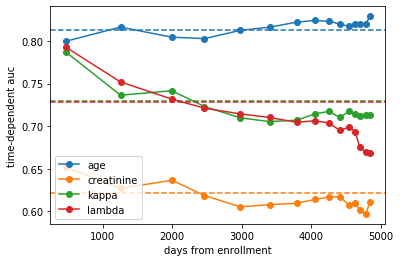

In [14]:
# We begin by considering individual real-valued features as risk scores 
# without actually fitting a survival model. Hence, we obtain an estimate 
# of how well age, creatinine, kappa FLC, and lambda FLC are able to distinguish 
# cases from controls at each time point.
for i, col in enumerate(num_columns):
    survival_data.plot_cumulative_dynamic_auc(x_test_imputed[:, i], col, color="C{}".format(i))
    ret = concordance_index_ipcw(survival_data.y_train, survival_data.y_test, x_test_imputed[:, i], tau=times[-1])


In [15]:
Models = EvaluateModel()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sksurv.datasets import load_flchain, load_gbsg2
from sksurv.functions import StepFunction
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.preprocessing import OneHotEncoder, encode_categorical
from sksurv.util import Surv

set_config(display="text")  # displays text representation of estimators
plt.rcParams['figure.figsize'] = [7.2, 4.8]

In [18]:
from sksurv.datasets import load_veterans_lung_cancer

va_x, va_y = load_veterans_lung_cancer()

va_x_train, va_x_test, va_y_train, va_y_test = train_test_split(
    va_x, va_y, test_size=0.2, stratify=va_y["Status"], random_state=0
)

In [19]:
cph = make_pipeline(OneHotEncoder(), CoxPHSurvivalAnalysis())
cph.fit(va_x_train, va_y_train)

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [23]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(Models.va_x_train)

TypeError: __init__() takes 1 positional argument but 2 were given

In [22]:
Models.va_x_train.dtypes

Age_in_years              float64
Celltype                 category
Karnofsky_score           float64
Months_from_Diagnosis     float64
Prior_therapy            category
Treatment                category
dtype: object